<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.utils import np_utils
from keras import datasets, layers, models
from keras.optimizers import SGD, Adam, RMSprop

In [2]:
(x_mnist_train,y_mnist_train),(x_mnist_test,y_mnist_test) = datasets.mnist.load_data()

In [3]:
print(x_mnist_train.dtype)
print(x_mnist_train.shape)
print(y_mnist_train.shape)
print(y_mnist_train.dtype)

uint8
(60000, 28, 28)
(60000,)
uint8


In [4]:
x_mnist_train = x_mnist_train.astype('float32')
x_mnist_test = x_mnist_test.astype('float32')
x_mnist_train /= 255
x_mnist_test /= 255


In [5]:
x_mnist_train = x_mnist_train[:,:,:,np.newaxis]
x_mnist_test = x_mnist_test[:,:,:,np.newaxis]

In [6]:
y_mnist_train = np_utils.to_categorical(y_mnist_train,10)
y_mnist_test = np_utils.to_categorical(y_mnist_test,10)

In [7]:
y_mnist_test.shape

(10000, 10)

In [8]:
cnn_increase = models.Sequential()


In [9]:
from keras.layers.reshaping.flatten import Flatten
cnn_increase.add(layers.Conv2D(6, kernel_size=(5,5), padding = "same", input_shape = (28,28,1)))
cnn_increase.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))

cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(11, kernel_size=(5,5), padding = "same"))

cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(12, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(13, kernel_size=(5,5), padding = "same"))

cnn_increase.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_increase.add(layers.Conv2D(14, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Conv2D(15, kernel_size=(5,5), padding = "same"))
cnn_increase.add(layers.Flatten())
cnn_increase.add(layers.Dense(10, activation= 'softmax'))
cnn_increase.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 7)         1057      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 7)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         1408      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 9)         1809      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 9)          0         
 2D)                                                    

In [10]:
# from keras.optimizers import SGD, Adam, RMSprop
# optimizers_list = [SGD(),Adam(),RMSprop()]

In [11]:
# for k in optimizers_list:
#   print(k)

In [ ]:
evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = SGD(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score1 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'SGD',score1[1])
      evaluation.append((i,j,'SGD',score1))




In [ ]:
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score2 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'Adam',score2[1])
      evaluation.append((i,j,'Adam',score2))

In [ ]:
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score3 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'RMSprop',score3[1])
      evaluation.append((i,j,'RMSprop',score3))

In [ ]:
cnn_decrease = models.Sequential()


In [ ]:
from keras.layers.reshaping.flatten import Flatten
cnn_decrease.add(layers.Conv2D(15, kernel_size=(5,5), padding = "same", input_shape = (28,28,1)))
cnn_decrease.add(layers.Conv2D(14, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(13, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(12, kernel_size=(5,5), padding = "same"))

cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(11, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))

cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))

cnn_decrease.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_decrease.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Conv2D(6, kernel_size=(5,5), padding = "same"))
cnn_decrease.add(layers.Flatten())
cnn_decrease.add(layers.Dense(10, activation= 'softmax'))
cnn_decrease.summary()


In [ ]:
decrease_evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = SGD(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score4 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'SGD',score4[1])
      decrease_evaluation.append((i,j,'SGD',score4))




In [ ]:
decrease_evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score5 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'Adam',score5[1])
      decrease_evaluation.append((i,j,'Adam',score5))




In [ ]:
decrease_evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score6 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'RMSprop',score6[1])
      decrease_evaluation.append((i,j,'RMSprop',score6))




In [ ]:
cnn_hourglass = models.Sequential()


In [ ]:
from keras.layers.reshaping.flatten import Flatten
cnn_hourglass.add(layers.Conv2D(6, kernel_size=(5,5), padding = "same", input_shape = (28,28,1)))
cnn_hourglass.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))

cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(11, kernel_size=(5,5), padding = "same"))

cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(10, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(9, kernel_size=(5,5), padding = "same"))

cnn_hourglass.add(layers.MaxPooling2D(pool_size =(5,5),strides=2, padding = "same"))
cnn_hourglass.add(layers.Conv2D(8, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Conv2D(7, kernel_size=(5,5), padding = "same"))
cnn_hourglass.add(layers.Flatten())
cnn_hourglass.add(layers.Dense(10, activation= 'softmax'))
cnn_hourglass.summary()


In [ ]:
hourglass_evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = SGD(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score7 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'SGD',score7[1])
      hourglass_evaluation.append((i,j,'SGD',score7))




In [ ]:
hourglass_evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score8 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'Adam',score8[1])
      hourglass_evaluation.append((i,j,'Adam',score8))




In [ ]:
hourglass_evaluation = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [100,250,500,750]:
    # for k in optimizers_list:
      cnn_increase.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(learning_rate=i),
                           metrics=['accuracy'])
      cnn_increase.fit(x_mnist_train,y_mnist_train,batch_size=j,epochs=25,validation_split=0.2)
      score9 = cnn_increase.evaluate(x_mnist_test,y_mnist_test,verbose=1)
      print(i,j,'RMSprop',score9[1])
      hourglass_evaluation.append((i,j,'RMSprop',score9))




In [2]:
import tensorflow as tf

from tensorflow import keras
from keras import datasets, layers, models

In [14]:
# l = list(tf.keras.datasets.cifar10.load_data())

In [15]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

[8]


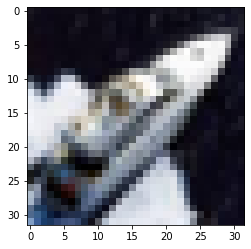

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20000])
print(y_train[20000])

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
import numpy as np

x_train_gray = np.sum(x_train/3, axis=3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims = True)


In [19]:
x_train_gray /= 255
x_test_gray /= 255

In [ ]:
x_train_gray

In [21]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), activation = 'tanh', input_shape= (32,32,1)))

model.add(layers.MaxPooling2D(strides=2))

model.add(layers.Conv2D(16, (5,5), activation = 'tanh'))

model.add(layers.MaxPooling2D(strides=2))

model.add(layers.Conv2D(120,(5,5), activation='tanh'))

model.add(layers.Flatten())

model.add(layers.Dense(84, activation='tanh'))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [ ]:
# 

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.96)

In [ ]:
scores = []
params = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [200,500,700,850]:
  # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  #   initial_learning_rate=1e-2,
  #   decay_steps=10000,
  #   decay_rate=0.96)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=i), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_gray, y_train, epochs=25, batch_size=j, verbose=1)
    score = model.evaluate(x_test_gray,y_test)
    scores.append(score)
    params.append((i,j,scores,'Adam'))


In [ ]:
for i in [0.01,0.1,0.25,0.5]:
  for j in [200,500,700,850]:
  # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  #   initial_learning_rate=1e-2,
  #   decay_steps=10000,
  #   decay_rate=0.96)
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=i), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_gray, y_train, epochs=75, batch_size=j, verbose=1)
    score = model.evaluate(x_test_gray,y_test)
    scores.append(score)
    params.append((i,j,scores,'SGD'))

In [ ]:
scores

In [ ]:
params

In [4]:
feed_forward = models.Sequential()
feed_forward.add(layers.Conv2D(64, kernel_size=5, padding="same",input_shape=(32,32,1),activation="tanh"))
feed_forward.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
feed_forward.add(layers.Conv2D(64, kernel_size=5, padding="same",activation="tanh"))
feed_forward.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
feed_forward.add(layers.Conv2D(64, kernel_size=5, padding="same",activation = "tanh"))
        # Flatten => RELU layers
feed_forward.add(layers.Flatten())
feed_forward.add(layers.Dense(64,activation = "tanh"))
        # a softmax classifier
feed_forward.add(layers.Dense(10,activation = "softmax"))
feed_forward.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 4096)             

In [26]:
scores_ffd = []
params_ffd = []
for i in [0.01,0.1,0.25,0.5]:
  for j in [200,500,700,850]:
  # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  #   initial_learning_rate=1e-2,
  #   decay_steps=10000,
  #   decay_rate=0.96)
    feed_forward.compile(optimizer=keras.optimizers.Adam(learning_rate=i), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    feed_forward.fit(x_train_gray, y_train, epochs=25, batch_size=j, verbose=1)
    score_ffd = model.evaluate(x_test_gray,y_test)
    scores_ffd.append(score)
    params_ffd.append((i,j))

Epoch 1/25
  1/250 [..............................] - ETA: 7:35 - loss: 3.6060 - accuracy: 0.1050

KeyboardInterrupt: ignored

In [35]:
X = np.array([[[7], [5], [0], [0], [3], [2]],
                   [[6], [4], [5], [1], [4], [8]],
                   [[9], [0], [2], [2], [5], [4]],
                   [[6], [3], [4], [7], [9], [8]],
                   [[5], [7], [5], [6], [9], [0]],
                   [[7], [9], [0], [8], [2], [3]]])

f = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])

In [38]:
X.shape[0]

6

Dimensions of X is 6

In [29]:
f.shape[0]

3

Dimensions of filter is 3

In [30]:
f.shape[0] * f.shape[1]

9

Parameters of kernel is 9

Formula to Convolution layer C = ((n-f+2p)/s)+1 

n = size of input matrix

f = size of the filter

p is the Padding

s = Stride

SO, n= 6,f =3,p=0,s =1

C=((6-3+2x0)/1)+1=4

Output Convolutional matrix will be of size  4 X 4.

Calculating Matrix 

=>7*1+5*0+0*-1+6*2+4*0+5*-2+9*1+0*0+(-1)*2 =>7+0+0+12+0-10+9=28-10=18

=> 5*1+0+0+4*2+0+1*-2+0+0+2*-1 =>9

=> 0+0+-3+5*2+0+4*-2+2*1+0+5*-1 => -4

=> 0+0+2*-1+1*2+0+8*-2+2*1+0+4*-1 => -18

Similarly 
2nd row => 17,-3,10,-12
3rd row => 11,-9,-17,2
4rth row => 9, -1, -15, 16

Entire Convolutional Matrix is


18	9	-4	-18
17	-3	-10	-12
11	-9	-17	2
9	-1	-15	16



Max pooling 

This selects the max values of all the matrix in each filter which is 3 X 3 with stride 1 from the convolutional matrix above

max(18,9,-4,17,-3,-10,11,-9,-17)=18
max(9,-4,-18,-3,-10,-12,-9,-17,2) = 9
max(17,-3,-10,11,-9,-17,9,-1,-15) = 17
max(9-3,-10,-12,-9,-17,2,-1,-15,16) = 16

Hence the final Max pooling matrix is 
18	9
17	16